# Linear Discriminant Analysis

## Lecture 3

### GRA 4160
### Predictive modelling with machine learning

#### Lecturer: Vegard H. Larsen

Linear Discriminant Analysis (LDA) is a supervised machine learning technique used for both dimensionality reduction and classification tasks. It is a linear method that projects the data onto a lower-dimensional space while maximizing the separation between different classes. This makes LDA particularly useful in fields such as pattern recognition, image and speech recognition, and natural language processing. Note that this should not be confused with Latent Dirichlet Allocation, also abbreviated as LDA, which is an unsupervised topic modeling algorithm.

### Key Idea Behind LDA

The core idea behind LDA is to find a linear combination of features that best separates the classes in the dataset. LDA achieves this by maximizing the **between-class variance** while minimizing the **within-class variance**. This is often referred to as optimizing the "Fisher criterion."

The optimization objective can be mathematically expressed as follows:

$$
J(w) = \frac{w^T S_B w}{w^T S_W w}
$$

where:
- $S_B$ is the **between-class scatter matrix**:
  $$
  S_B = \sum_{i=1}^{k} N_i (\mu_i - \mu)(\mu_i - \mu)^T
  $$
  Here,  $k$ is the number of classes, $\mu_i$ is the mean vector of class $i$, $\mu$ is the overall mean vector of the data, and $N_i$ is the number of samples in class $i$.

- $S_W$ is the **within-class scatter matrix**:
  $$
  S_W = \sum_{i=1}^{k} \sum_{x \in C_i} (x - \mu_i)(x - \mu_i)^T
  $$
  Here, $C_i$ represents the set of samples in class $i$, and $x$ is a feature vector.

- $w$ is the projection vector that maps the data onto the new lower-dimensional space.

### Steps in LDA

1. **Compute the mean vectors** for each class and the overall mean of the data.
2. **Compute the within-class scatter matrix $S_W$** and the between-class scatter matrix $S_B$.
3. Solve the generalized eigenvalue problem for $S_W^{-1} S_B$:
   $$
   S_W^{-1} S_B w = \lambda w
   $$
   Here, $\lambda$ are the eigenvalues, and $w$ are the eigenvectors. The eigenvectors corresponding to the largest eigenvalues form the optimal discriminant axes.
4. Select the top $m$ eigenvectors (where $m$ is the desired dimensionality) to construct the transformation matrix.
5. Project the data onto the new lower-dimensional space.

### Applications of LDA

In practice, LDA is frequently used as a preprocessing step before applying classifiers like logistic regression or support vector machines. By reducing the dimensionality, LDA simplifies the problem, improves classifier performance, and reduces computational cost. Additionally, LDA can serve as a standalone classifier, in which case the decision boundary is linear.

When used as a classifier, LDA assumes that the data in each class follows a Gaussian distribution with a shared covariance matrix. Based on this assumption, the decision rule for classification is:

$$
\text{Classify } x \text{ into class } i \text{ if: } P(C_i | x) > P(C_j | x), \, \forall j \neq i
$$

The posterior probability $P(C_i | x)$ can be derived from Bayes' theorem.

### Implementation in Scikit-Learn

We will not dive into all the mathematical details of implementing LDA but will look at a practical example using Scikit-Learn. It provides a convenient implementation of LDA that can be used both for dimensionality reduction and classification.

## Scikit-learn example

Let's use the `make_classification` from Scikit-learn to generate some toy data with 2 informative features and 2 classes.

In [1]:
## Generate some data

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate some toy data
# Parameters:
# n_samples: The number of samples to generate
# n_features: The number of features (independent variables)
# n_redundant: The number of redundant features (features that are linear combinations of other features)
# n_informative: The number of informative features (features that determine the target)
# n_clusters_per_class: The number of clusters per class (class = target)
# class_sep: The factor by which the classes are linearly separable (larger values make the problem easier)
# random_state: The seed used by the random number generator
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, class_sep=0.75, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33, random_state=42)
X_train[0:5], y_train[0:5]

(array([[-0.47131493, -0.71420127],
        [ 0.46099872,  0.15604731],
        [-1.02509973,  0.8634649 ],
        [-1.70152462, -0.6246856 ],
        [-0.75544154,  1.27897328]]),
 array([0, 1, 0, 0, 0]))

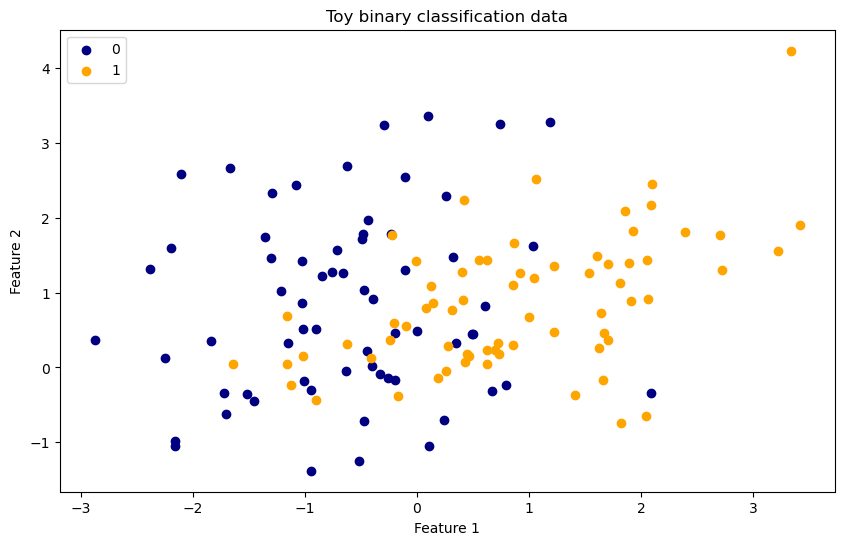

In [2]:
# Visualize data

plt.figure(figsize=(10, 6))
colors = ['navy', 'orange']
target_names = list(set(y))
for i, label in enumerate(target_names):
    plt.scatter(X_train[y_train==i, 0], X_train[y_train==i, 1], label=label, c=colors[i])
plt.legend()
plt.title('Toy binary classification data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [3]:
# Fit the lda

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create an instance of the LDA model
# n_components: The number of components to keep after transformation
lda = LinearDiscriminantAnalysis(n_components=1)

# Fit the model to the data
lda.fit(X_train, y_train)

# We can now project the data onto a lower dimensional space

X_transformed = lda.transform(X_train)
#X_transformed

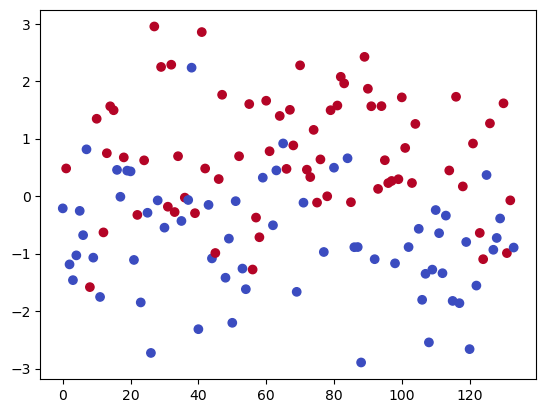

In [4]:
# We can plot the LDA component

plt.scatter(range(len(X_transformed)), X_transformed, c=y_train, cmap=plt.cm.coolwarm)

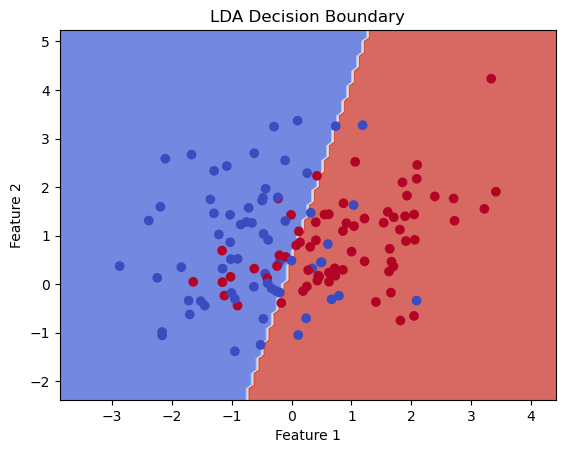

In [5]:
# Plot the decision boundary
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot the original data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('LDA Decision Boundary')
plt.show()

## Evaluate on the test set

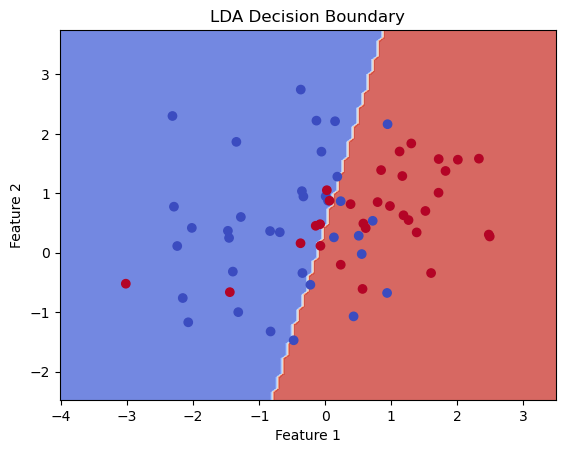

In [6]:
# Plot the decision boundary
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot the original data points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('LDA Decision Boundary')
plt.show()

In [7]:
plt.show()
lda.score(X_test, y_test)

0.7424242424242424

# Linear Discriminant Analysis on the iris dataset

Here we load the Iris dataset from scikit-learn, which includes 150 samples of iris flowers, each with 4 features (sepal length, sepal width, petal length, and petal width). Next, we split the data into a training set and a test set.

We create an instance of the LinearDiscriminantAnalysis class and set the number of components to 2. This reduces the dimensionality of the data from 4 to 2, allowing for easier visualization.

Finally, we use the fit_transform method on the training data to fit the LDA model and transform the data. Then we use the transform method on the test data to transform it using the LDA model learned from the training set.

It's important to note that LDA is a supervised method, and it requires the class labels to be passed as an argument in the fit method (y_train) in order to learn the class means and variances.

We also create a scatter plot of the transformed data, where the x-axis corresponds to the first linear discriminant (LD1) and the y-axis corresponds to the second linear discriminant (LD2). The color of each point represents the class label of the corresponding sample.

With this plot, it's easy to see how the LDA has separated the different classes of iris flowers based on the two linear discriminants. This can be useful for visualizing the structure of the data and for understanding how well the LDA algorithm is able to separate the classes.

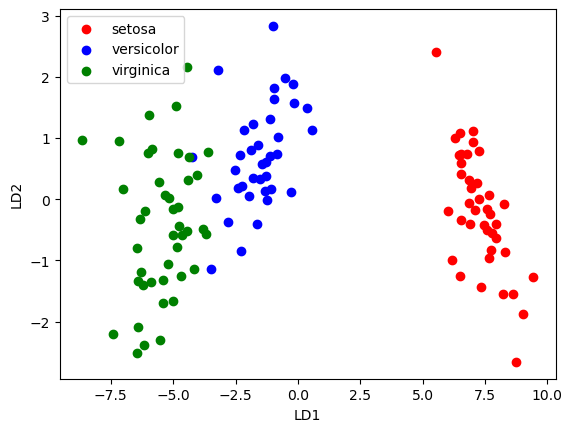

In [10]:
from sklearn.datasets import load_iris # Importing the iris dataset

iris = load_iris()
X2, y2 = iris.data, iris.target

# Split the data into a train and test set
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=10)

# Creating an instance of LinearDiscriminantAnalysis and setting number of components to 2
lda = LinearDiscriminantAnalysis(n_components=2)

# Fitting and transforming the training data
X_train_lda = lda.fit_transform(X_train2, y_train2)

# Transforming the test data using the model learned from training data
X_test_lda = lda.transform(X_test2)

# assign label to each type of flower
target_names = iris.target_names
colors = ['red', 'blue', 'green']
for i, label in enumerate(target_names):
    plt.scatter(X_train_lda[y_train2==i, 0], X_train_lda[y_train2==i, 1], label=label, c=colors[i])
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

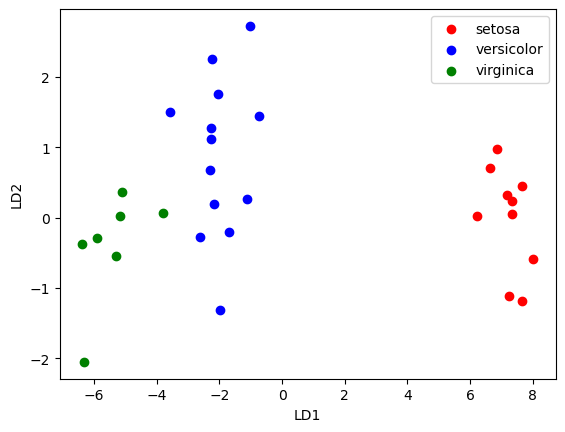

In [11]:
# Plot the separation of the test data

# assign label to each type of flower
target_names = iris.target_names
colors = ['red', 'blue', 'green']
for i, label in enumerate(target_names):
    plt.scatter(X_test_lda[y_test2==i, 0], X_test_lda[y_test2==i, 1], label=label, c=colors[i])

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

# LDA from scratch 

In [13]:
class LDAFromScratch:
    def __init__(self, n_components=None):
        """
        A simple from-scratch implementation of Linear Discriminant Analysis (LDA).
        
        Parameters
        ----------
        n_components : int or None
            The number of linear discriminants to keep.
            If None, it will be set to (num_classes - 1).
        """
        self.n_components = n_components
        
    def fit(self, X, y):
        """
        Fit the LDA model given training data X and labels y.
        
        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
        y : array-like of shape (n_samples,)
        """
        X = np.asarray(X)
        y = np.asarray(y)
        
        # 1. Store unique classes
        self.classes_ = np.unique(y)
        n_features = X.shape[1]
        n_samples = X.shape[0]
        
        # 2. Compute class means and priors
        self.means_ = {}
        self.priors_ = {}
        self.class_count_ = {}
        
        for c in self.classes_:
            X_c = X[y == c]
            self.means_[c] = np.mean(X_c, axis=0)
            self.class_count_[c] = X_c.shape[0]
        
        for c in self.classes_:
            self.priors_[c] = self.class_count_[c] / n_samples
        
        # 3. Compute within-class scatter matrix (S_W)
        S_W = np.zeros((n_features, n_features))
        for c in self.classes_:
            X_c = X[y == c]
            mean_c = self.means_[c].reshape(-1, 1)
            for x in X_c:
                x = x.reshape(-1, 1)
                S_W += (x - mean_c) @ (x - mean_c).T
        
        # 4. Compute the pooled covariance
        #    (Divide by (N - k) to get the unbiased estimate, consistent with sklearn)
        self.cov_ = S_W / (n_samples - len(self.classes_))
        self.cov_inv_ = np.linalg.inv(self.cov_)
        
        # 5. Compute between-class scatter matrix (S_B)
        self.overall_mean_ = np.mean(X, axis=0).reshape(-1, 1)
        S_B = np.zeros((n_features, n_features))
        
        for c in self.classes_:
            n_c = self.class_count_[c]
            mean_c = self.means_[c].reshape(-1, 1)
            mean_diff = (mean_c - self.overall_mean_)
            S_B += n_c * (mean_diff @ mean_diff.T)
        
        # 6. Solve the eigenvalue problem for Sigma^{-1} S_B
        #    We take the real parts because of possible tiny imaginary numerical issues.
        A = np.linalg.inv(self.cov_) @ S_B
        eigvals, eigvecs = np.linalg.eig(A)
        eigvals = np.real(eigvals)
        eigvecs = np.real(eigvecs)
        
        # 7. Sort eigenvalues/eigenvectors in descending order
        idx = np.argsort(eigvals)[::-1]
        eigvals = eigvals[idx]
        eigvecs = eigvecs[:, idx]
        
        # 8. Select the top n_components
        if self.n_components is None:
            self.n_components = len(self.classes_) - 1
        self.W_ = eigvecs[:, :self.n_components]
        
    def predict(self, X):
        """
        Predict the class labels for samples in X using the fitted model.
        
        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
        
        Returns
        -------
        y_pred : ndarray of shape (n_samples,)
        """
        X = np.asarray(X)
        y_pred = []
        
        # For classification, we use the linear discriminant rule:
        # delta_c(x) = x^T * cov_inv_ * mean_c - 0.5 * mean_c^T * cov_inv_ * mean_c + log(prior_c)
        for x in X:
            best_score = -np.inf
            best_class = None
            for c in self.classes_:
                mean_c = self.means_[c]
                w_c = self.cov_inv_ @ mean_c
                score_c = x @ w_c - 0.5 * (mean_c @ w_c) + np.log(self.priors_[c])
                
                if score_c > best_score:
                    best_score = score_c
                    best_class = c
            y_pred.append(best_class)
        
        return np.array(y_pred)
    
    def transform(self, X):
        """
        Project the data X onto the linear discriminants.
        
        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
        
        Returns
        -------
        X_lda : ndarray of shape (n_samples, n_components)
        """
        X = np.asarray(X)
        # Typically we subtract the overall mean before projecting
        X_centered = X - self.overall_mean_.ravel()
        return X_centered @ self.W_

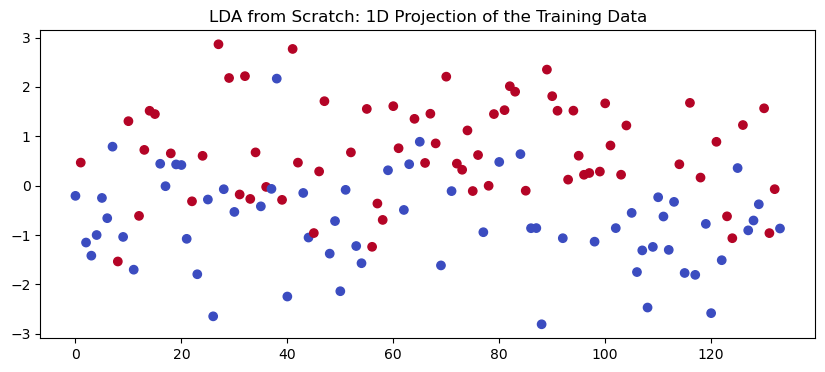

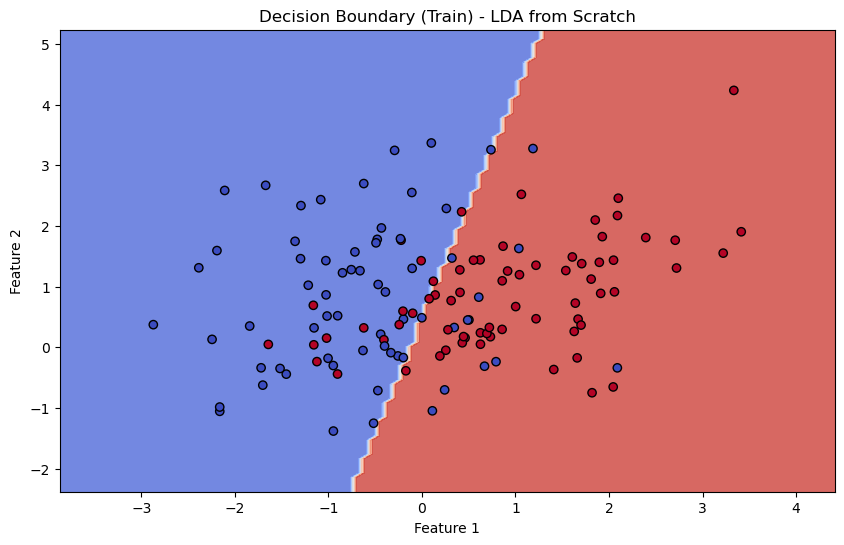

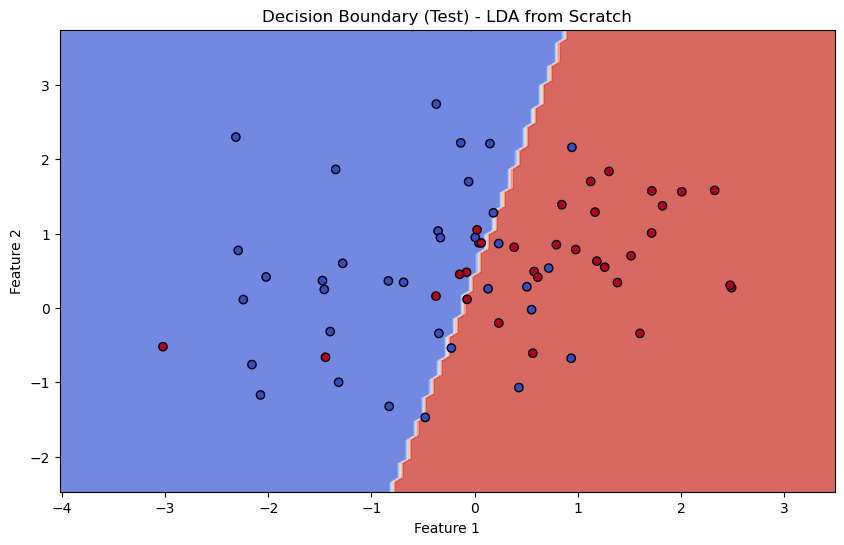

Accuracy on test set (LDA from scratch): 0.7424242424242424


In [14]:
# 1. Instantiate our LDA from scratch
lda_scratch = LDAFromScratch(n_components=1)

# 2. Fit the model
lda_scratch.fit(X_train, y_train)

# 3. Transform the training data
X_transformed_scratch = lda_scratch.transform(X_train)

# 4. Compare visually with the scikit-learn transform:
plt.figure(figsize=(10, 4))
plt.scatter(range(len(X_transformed_scratch)), X_transformed_scratch, c=y_train, cmap=plt.cm.coolwarm)
plt.title("LDA from Scratch: 1D Projection of the Training Data")
plt.show()

# 5. Plot the decision boundary on the training set
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z_scratch = lda_scratch.predict(np.c_[xx.ravel(), yy.ravel()])
Z_scratch = Z_scratch.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_scratch, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary (Train) - LDA from Scratch')
plt.show()

# 6. Evaluate on the test set (decision boundary + accuracy)
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z_scratch_test = lda_scratch.predict(np.c_[xx.ravel(), yy.ravel()])
Z_scratch_test = Z_scratch_test.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_scratch_test, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolor='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary (Test) - LDA from Scratch')
plt.show()

# 7. Report accuracy
y_pred_test_scratch = lda_scratch.predict(X_test)
accuracy_scratch = np.mean(y_pred_test_scratch == y_test)
print("Accuracy on test set (LDA from scratch):", accuracy_scratch)